In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [19]:

query = """SELECT 
((strftime('%s',time_last_updated)-strftime('%s',time_last_updated,'start of day'))/(3600/4))/4.0 as hour_of_day
,avg(CASE WHEN time_delta>0 THEN time_delta/60.0 ELSE NULL END) as t_delta
,SUM(time_delta>0) as t_delta_count
,count(*) as total_count
,SUM(time_delta>0)/(1.0*count(*)) as  delay_frac
FROM journey
WHERE goto_station='Slussen' 
GROUP BY 1"""


conn = sqlite3.connect("../bus_delay/bus_get_raw/bus_raw_1week.db")
#cur = conn.execute(query)
#print(cur.fetchall())

df = pd.read_sql_query(query, conn, index_col=None, coerce_float=True)
print(df.head(3))


   hour_of_day   t_delta  t_delta_count  total_count  delay_frac
0         0.00  2.068847            107         1032    0.103682
1         0.25  2.347360            101         1010    0.100000
2         0.50  2.128333             80          878    0.091116


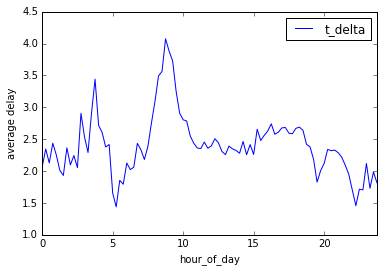

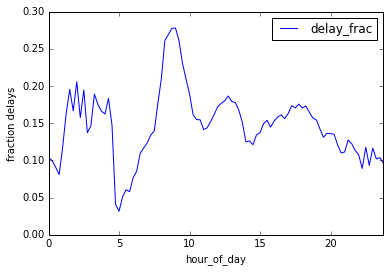

In [20]:
plt.figure(1)
df[['hour_of_day','t_delta']].plot(x='hour_of_day')
plt.ylabel('average delay')
plt.show()

plt.figure(2)
df[['hour_of_day','delay_frac']].plot(x='hour_of_day')
plt.ylabel('fraction delays')
plt.show()
